## Cluster similar instances together

In [1]:
from pycelonis import get_celonis
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

#### Get the OLAP table from analysis containing the data you want to cluster.

In [2]:
celonis = get_celonis()
analysis= celonis.analyses.find("8e836119-7b1a-4675-b62b-cbab20ac127a")
df = analysis.draft.components.find("Cluster Activities").get_data_frame()
df.head()

2020-02-14 12:56:29 - pycelonis: Login successful! Hello Application Key, this key currently has access to 9 analyses.
2020-02-14 12:56:30 - pycelonis: Best matches: [(0.95, '#{Cluster Activities}'), (0.0, '')]


,_CEL_XES_ACTIVITIES.ACTIVITY_EN,_CEL_XES_ACTIVITIES.EVENTTIME,_CEL_XES_ACTIVITIES._SORTING,Total throughput time in days,Variants
0,complete,2013-03-28 12:22:23,NEW,206.0,"NEW, CHANGE DIAGN, FIN, RELEASE, CODE OK, BILLED"
1,complete,2013-03-28 12:22:47,CHANGE DIAGN,206.0,"NEW, CHANGE DIAGN, FIN, RELEASE, CODE OK, BILLED"
2,complete,2013-06-29 19:25:30,FIN,206.0,"NEW, CHANGE DIAGN, FIN, RELEASE, CODE OK, BILLED"
3,complete,2013-06-29 22:33:55,RELEASE,206.0,"NEW, CHANGE DIAGN, FIN, RELEASE, CODE OK, BILLED"
4,complete,2013-07-01 23:54:44,CODE OK,206.0,"NEW, CHANGE DIAGN, FIN, RELEASE, CODE OK, BILLED"


#### Encoding Non-numeric fields to numeric fields

In [3]:
enc = LabelEncoder()
enc.fit(df['_CEL_XES_ACTIVITIES.ACTIVITY_EN'])
df['_CEL_XES_ACTIVITIES.ACTIVITY_EN'] = enc.transform(df['_CEL_XES_ACTIVITIES.ACTIVITY_EN'])
enc.fit(df['_CEL_XES_ACTIVITIES._SORTING'])
df['_CEL_XES_ACTIVITIES._SORTING'] = enc.transform(df['_CEL_XES_ACTIVITIES._SORTING'])
enc.fit(df['Variants'])
df['Variants'] = enc.transform(df['Variants'])


#### Dropping Event time column

In [4]:
df.drop(["_CEL_XES_ACTIVITIES.EVENTTIME"], inplace=True, axis=1)


#### Replace null values in throughput column with mean and then dropping rows with Null values

In [5]:
df['Total throughput time in days'] = df['Total throughput time in days'].fillna(df['Total throughput time in days'].mean())
df.dropna()

,_CEL_XES_ACTIVITIES.ACTIVITY_EN,_CEL_XES_ACTIVITIES._SORTING,Total throughput time in days,Variants
0,0,11,206.000000,206
1,0,1,206.000000,206
2,0,8,206.000000,206
3,0,13,206.000000,206
4,0,5,206.000000,206
5,0,0,206.000000,206
6,0,11,379.000000,657
7,0,8,379.000000,657
8,0,13,379.000000,657
9,0,5,379.000000,657


#### Run Kmeans to cluster data into 4 groups

In [6]:
kmeans = KMeans(n_clusters=5).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)
predict = kmeans.predict(df)
df['cluster'] = predict

[[  0.           6.47443238 121.0561977  213.87910148]
 [  0.           7.68426872 369.32081502 660.3247121 ]
 [  0.           7.90248505  96.03051135 634.41680828]
 [  0.           7.11709657 410.34297658 233.27153104]
 [  0.           8.52051234 153.61645184  16.82800832]]


#### Plot the clusters

#### Plotting based on 2 features only, since it is more complicated and time complex to plot in N dimension One function to do that can be: 
###### pd.plotting.parallel_coordinates(df,'cluster')

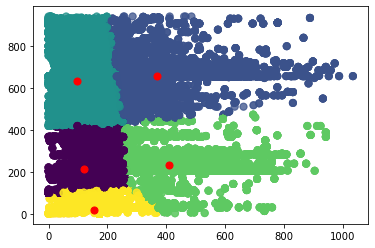

In [8]:
plt.scatter(df['Total throughput time in days'], df['Variants'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 2], centroids[:, 3], c='red', s=50)